## LSTM (Using Autoregressive Multi-Step Approach)

* Predict future steps recursively using model’s previous output as input.

* Feedback loop is used where predictions become inputs for the next step. 

In [1]:
import pandas as pd
import numpy as np

# Load the training and testing datasets
train_data = pd.read_csv('TE1.csv')
test_data = pd.read_csv('TR1.csv')

# Check the column names and structure
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

# Normalize `IP Delay (ms)` in the training data if not already normalized
if 'Normalized IP Delay' not in train_data.columns:
    min_train = train_data['IP Delay (ms)'].min()
    max_train = train_data['IP Delay (ms)'].max()
    train_data['Normalized IP Delay'] = (train_data['IP Delay (ms)'] - min_train) / (max_train - min_train)

if 'Normalized IP Delay' not in test_data.columns:
    min_test = test_data['IP Delay (ms)'].min()
    max_test = test_data['IP Delay (ms)'].max()
    test_data['Normalized IP Delay'] = (test_data['IP Delay (ms)'] - min_test) / (max_test - min_test)

print("Training Data Head:\n", train_data.head())
print("Testing Data Head:\n", test_data.head())

Training Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Testing Data Columns: Index(['SN', 'IP Delay (ms)'], dtype='object')
Training Data Head:
      SN  IP Delay (ms)  Normalized IP Delay
0  9001      20.951986             0.839265
1  9002      20.885944             0.827640
2  9003      20.895958             0.829402
3  9004      20.812035             0.814630
4  9005      20.740986             0.802124
Testing Data Head:
    SN  IP Delay (ms)  Normalized IP Delay
0   1      20.129919             0.709040
1   2      19.016027             0.510940
2   3      19.000053             0.508099
3   4      17.980814             0.326832
4   5      20.273924             0.734651


In [2]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])  # Sequence of delays
        y.append(data[i+sequence_length])   # Target value (next step)
    return np.array(X), np.array(y)

# Define sequence length (number of previous steps to consider)
sequence_length = 10  # Adjust as needed

# Generate sequences for training data
train_values = train_data['Normalized IP Delay'].values
X_train, y_train = create_sequences(train_values, sequence_length)

# Reshape training input for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Add feature dimension

# Generate sequences for testing data
test_values = test_data['Normalized IP Delay'].values
X_test, y_test = create_sequences(test_values, sequence_length)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Display the shapes of training and testing datasets
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (3490, 10, 1)
y_train Shape: (3490,)
X_test Shape: (8990, 10, 1)
y_test Shape: (8990,)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the RNN model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),  # RNN layer 
    Dropout(0.2),
    Dense(1)  # Output layer for predicting one value
])

# Compile the model
model.compile(optimizer='adam', loss='huber')  # Use the loss function
model.summary()


c:\ML\PYTHON\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0613 - val_loss: 0.0153
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0149 - val_loss: 0.0114
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0117 - val_loss: 0.0093
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0092 - val_loss: 0.0074
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044 - va

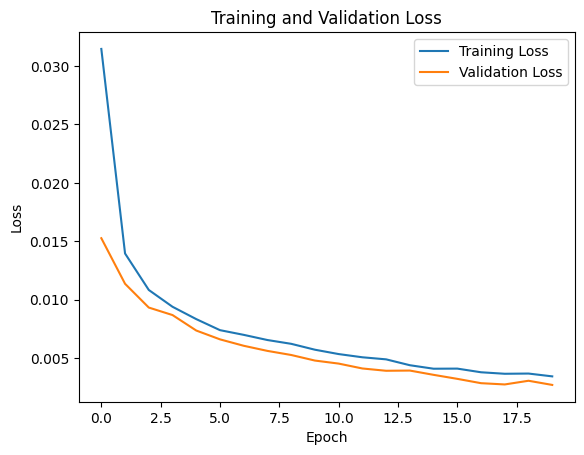

In [4]:
# Train the RNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [5]:
# Multi-step iterative prediction
def multi_step_prediction(initial_sequence, model, future_steps):
    current_sequence = initial_sequence
    predicted_delays = []

    for _ in range(future_steps):
        # Predict the next delay
        next_delay = model.predict(current_sequence.reshape(1, current_sequence.shape[0], 1))
        predicted_delays.append(next_delay.flatten()[0])  # Save prediction

        # Update the sequence: remove oldest value and append new prediction
        current_sequence = np.append(current_sequence[1:], next_delay).reshape(-1, 1)

    return predicted_delays

# Select the starting sequence (e.g., the first sequence in X_test)
starting_sequence = X_test[0]

# Number of future steps to predict
future_steps = 10

# Perform multi-step prediction
predicted_delays = multi_step_prediction(starting_sequence, model, future_steps)
print("Predicted delays for future steps:", predicted_delays)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted delays for future steps: [np.float32(0.30827832), np.float32(0.33600295), np.float32(0.3627774), np.float32(0.38134646), np.float32(0.39138734), np.float32(0.38954166), np.float32(0.39553526), np.float32(0.4004942), np.float32(0.40176645), np.float32(0.39976797)]


In [6]:
# Denormalize predictions
denormalized_predictions = (np.array(predicted_delays) * (test_data['IP Delay (ms)'].max() - test_data['IP Delay (ms)'].min())) + test_data['IP Delay (ms)'].min()
print("Denormalized Predicted Delays:", denormalized_predictions)


Denormalized Predicted Delays: [17.87649058 18.03238236 18.18293154 18.28734279 18.34380129 18.33342324
 18.36712446 18.39500783 18.40216158 18.39092438]


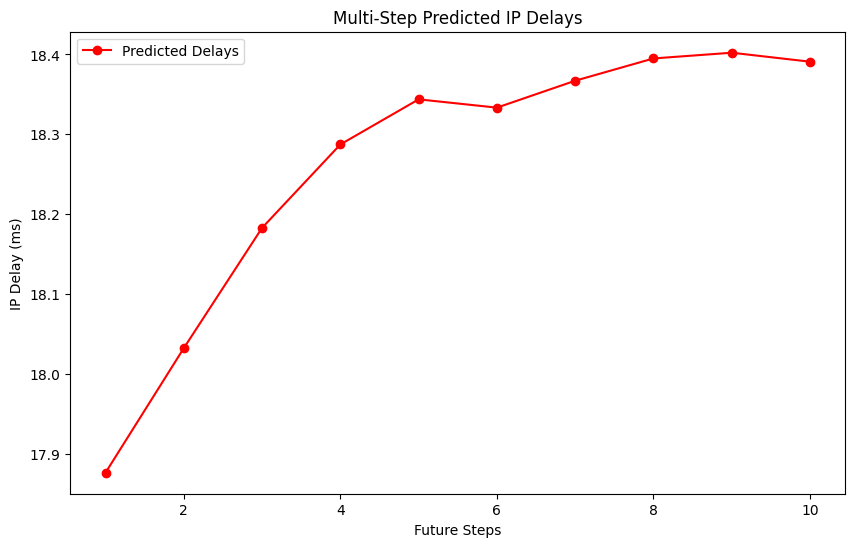

In [7]:
import matplotlib.pyplot as plt

# Plot predicted delays
plt.figure(figsize=(10, 6))
plt.plot(range(1, future_steps + 1), denormalized_predictions, marker='o', label='Predicted Delays', color='red')
plt.title('Multi-Step Predicted IP Delays')
plt.xlabel('Future Steps')
plt.ylabel('IP Delay (ms)')
plt.legend()
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
      SN  Actual IP Delay (ms)  Predicted IP Delay (ms)  \
124  125             18.204927                18.416411   
125  126             18.204927                18.331016   
126  127             18.220901                18.275550   
127  128             18.082142                18.246481   
128  129             18.108130                18.181384   
129  130             17.943144                18.147238   
130  131             17.950058                18.064662   
131  132             17.831087                18.007805   
132  133             17.795801                17.925526   
133  134             17.668962                17.853732   
134  135             17.683029                17.757800   
135  136             17.536879                17.694633   
136  137             17.533064                17.600174   
137  138             17.518997                17.533337   
138  139             17.393112                17.484348   
139  140       

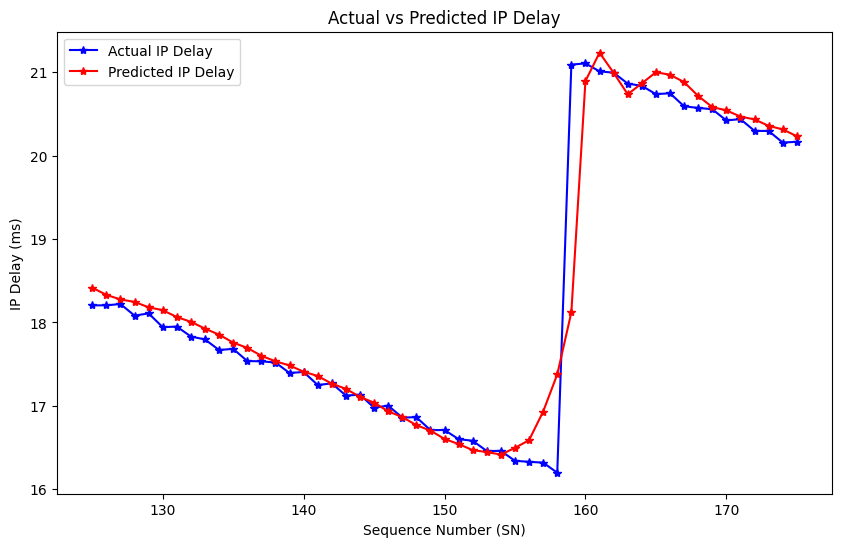

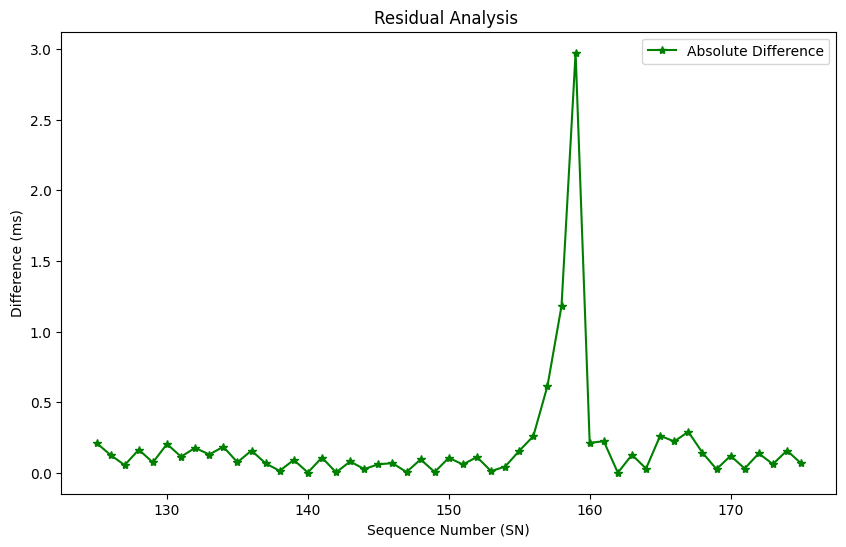

In [8]:
# Predict for all sequences in testing data
predictions = model.predict(X_test)

# Denormalize predictions
min_test = test_data['IP Delay (ms)'].min()
max_test = test_data['IP Delay (ms)'].max()
denormalized_predictions = (predictions.flatten() * (max_test - min_test)) + min_test

# Extract actual values and denormalize them
denormalized_actual = (y_test * (max_test - min_test)) + min_test

# Create a comparison table
comparison_df = pd.DataFrame({
    'SN': range(1, len(denormalized_actual) + 1),
    'Actual IP Delay (ms)': denormalized_actual,
    'Predicted IP Delay (ms)': denormalized_predictions,
    'Absolute Difference (ms)': abs(denormalized_actual - denormalized_predictions)
})

# Filter comparison_df for SN 100 to 200
filtered_df = comparison_df[(comparison_df['SN'] >= 125) & (comparison_df['SN'] <= 175)]

# Print filtered comparison
print(filtered_df)

# Optional: Save the comparison table to a CSV file
comparison_df.to_csv('comparison_results.csv', index=False)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Actual IP Delay (ms)'], label='Actual IP Delay',marker='*', color='blue')
plt.plot(filtered_df['SN'], filtered_df['Predicted IP Delay (ms)'], label='Predicted IP Delay',marker='*', color='red')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('IP Delay (ms)')
plt.title('Actual vs Predicted IP Delay')
plt.legend()
plt.show()

# Plot Residuals (Absolute Difference)
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['SN'], filtered_df['Absolute Difference (ms)'], label='Absolute Difference',marker='*', color='green')
plt.xlabel('Sequence Number (SN)')
plt.ylabel('Difference (ms)')
plt.title('Residual Analysis ')
plt.legend()
plt.show()
